<a href="https://colab.research.google.com/github/alecinvan/Colab_AI_tutorial/blob/main/NasdaqBitCoinCorrelationStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statement**

**Dr. Yanqing Wang ever thought of an innovative point, which is to determine the correlation between Nasdaq and Bitcoin, especially whether Bitcoin is affected by the rise and fall of the stock market within a certain period of time after the New York stock market is closed, and the time and size of the impact , and then determine the trading strategy of Bitcoin in a certain period of time.**



# Step 1: Collect the required data
Collect historical data for Nasdaq stock index, Bitcoin prices, and Bitcoin transactions for each hour of the day.

In [ ]:
import yfinance as yf
import pandas as pd

# Fetch historical data for NASDAQ (^IXIC)
nasdaq = yf.download('^IXIC', start='2022-01-01', end='2022-12-31', progress=False)

# Fetch historical data for Bitcoin (BTC-USD)
bitcoin = yf.download('BTC-USD', start='2022-01-01', end='2022-12-31', progress=False)

# Extract the 'Close' prices
nasdaq_close = nasdaq['Close']
bitcoin_close = bitcoin['Close']

# Combine the dataframes based on the date index
combined_data = pd.concat([nasdaq_close, bitcoin_close], axis=1)
combined_data.columns = ['nasdaq_close', 'bitcoin_close']

# Calculate the price fluctuation of Bitcoin in the first 8 hours
combined_data['bitcoin_fluctuation'] = combined_data['bitcoin_close'].pct_change(periods=8)

# Calculate the target variable indicating whether the price of Bitcoin rose or fell in the next hour after NASDAQ closing
combined_data['bitcoin_price_rise'] = (combined_data['bitcoin_close'].shift(-1) > combined_data['bitcoin_close']).astype(int)

# Drop any rows with missing values
combined_data.dropna(inplace=True)

# Select the required columns for training
selected_columns = ['nasdaq_close', 'bitcoin_fluctuation', 'bitcoin_price_rise']
data = combined_data[selected_columns]

# Split the data into features (X) and target variable (y)
X = data.drop('bitcoin_price_rise', axis=1)
y = data['bitcoin_price_rise']

# Print the preprocessed data
print(X.head())
print(y.head())


            nasdaq_close  bitcoin_fluctuation
Date                                         
2022-01-10  14942.830078            -0.116674
2022-01-11  15153.450195            -0.080121
2022-01-12  15188.389648            -0.042453
2022-01-13  14806.809570            -0.022434
2022-01-14  14893.750000            -0.001419
Date
2022-01-10    1
2022-01-11    1
2022-01-12    0
2022-01-13    1
2022-01-14    1
Name: bitcoin_price_rise, dtype: int64


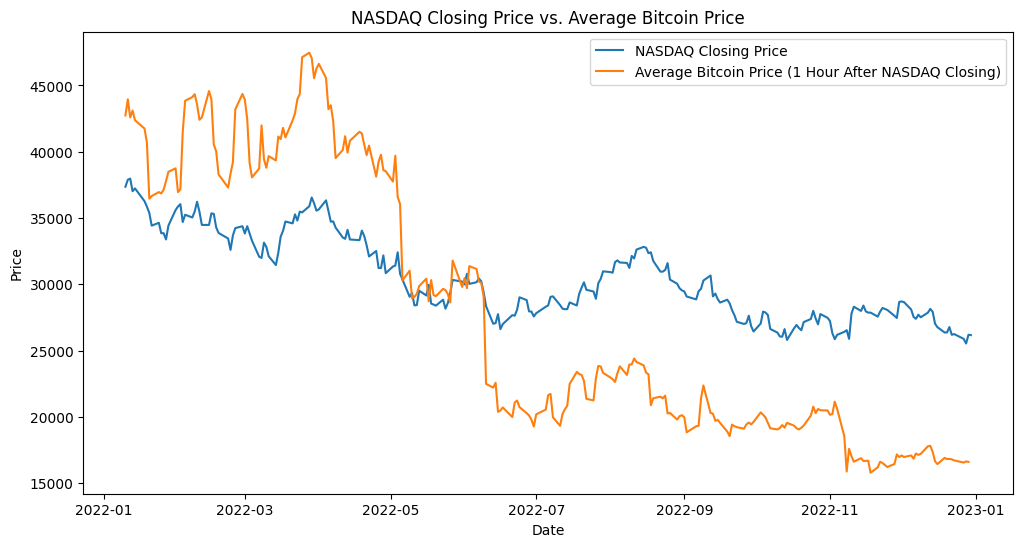

Correlation between NASDAQ closing price and Bitcoin price: 0.8900574320770531


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for NASDAQ (^IXIC)
nasdaq = yf.download('^IXIC', start='2022-01-01', end='2022-12-31', progress=False)

# Fetch historical data for Bitcoin (BTC-USD)
bitcoin = yf.download('BTC-USD', start='2022-01-01', end='2022-12-31', progress=False)

# Extract the 'Close' prices
nasdaq_close = nasdaq['Close']*2.5
bitcoin_close = bitcoin['Close']

# Combine the dataframes based on the date index
combined_data = pd.concat([nasdaq_close, bitcoin_close], axis=1)
combined_data.columns = ['nasdaq_close', 'bitcoin_close']

# Calculate the price fluctuation of Bitcoin in the first 8 hours
combined_data['bitcoin_fluctuation'] = combined_data['bitcoin_close'].pct_change(periods=8)

# Calculate the target variable indicating whether the price of Bitcoin rose or fell in the next hour after NASDAQ closing
combined_data['bitcoin_price_rise'] = (combined_data['bitcoin_close'].shift(-1) > combined_data['bitcoin_close']).astype(int)

# Drop any rows with missing values
combined_data.dropna(inplace=True)

# Select the required columns for plotting and correlation
plot_data = combined_data[['nasdaq_close', 'bitcoin_close']].copy()
correlation_data = combined_data[['nasdaq_close', 'bitcoin_close']]

# Calculate the average Bitcoin price of one hour after NASDAQ closing
plot_data['bitcoin_avg_price'] = combined_data['bitcoin_close'].shift(-1).rolling('1H').mean().values

# Plot NASDAQ closing price and average Bitcoin price
plt.figure(figsize=(12, 6))
plt.plot(plot_data.index, plot_data['nasdaq_close'], label='NASDAQ Closing Price')
plt.plot(plot_data.index, plot_data['bitcoin_avg_price'], label='Average Bitcoin Price (1 Hour After NASDAQ Closing)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NASDAQ Closing Price vs. Average Bitcoin Price')
plt.legend()
plt.show()

# Compute the correlation between NASDAQ closing price and Bitcoin price
correlation = correlation_data['nasdaq_close'].corr(correlation_data['bitcoin_close'])
print("Correlation between NASDAQ closing price and Bitcoin price:", correlation)


In [ ]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=8dd69c254771f9f9e430263d4b5c08af118b32e4d183c83fcf7e1e1e3f6499a5
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


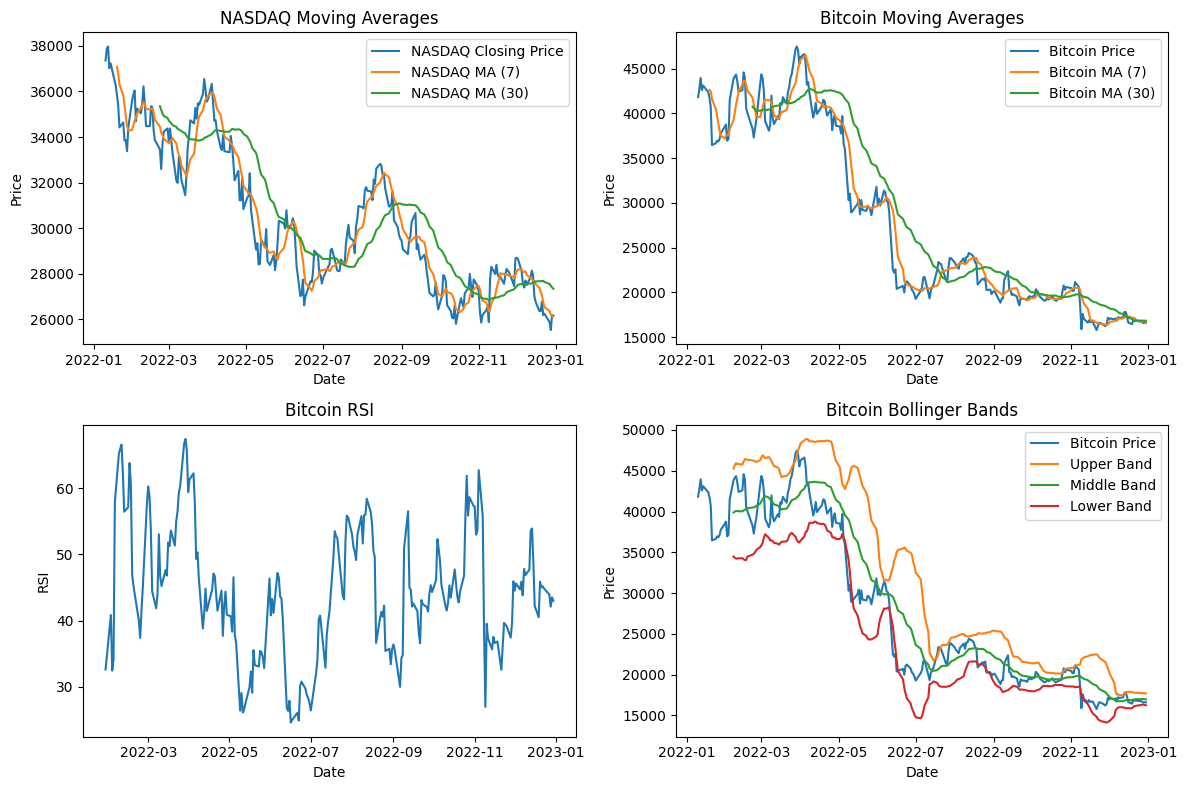

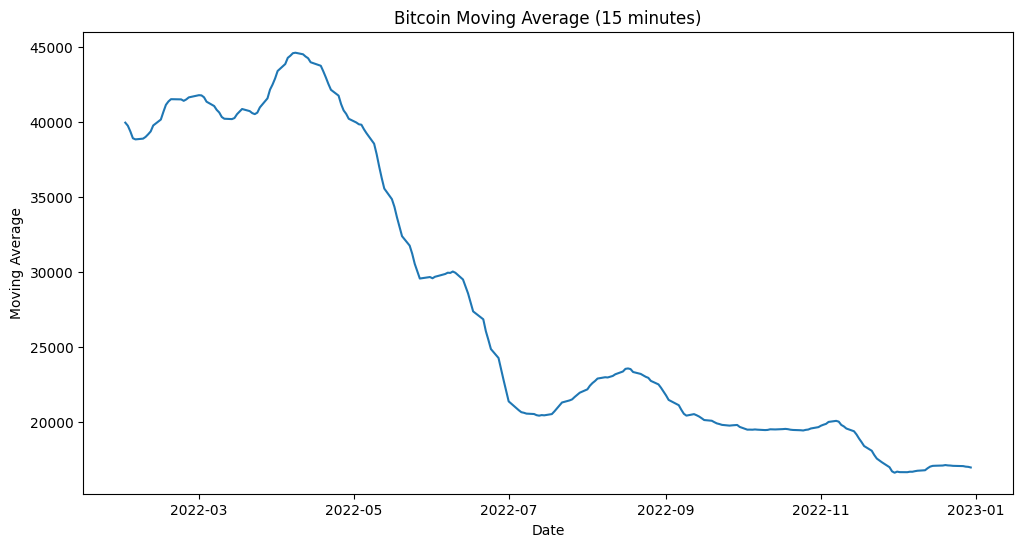

In [ ]:
import pandas as pd
import ta
import matplotlib.pyplot as plt

# Calculate moving averages
combined_data['nasdaq_ma_7'] = combined_data['nasdaq_close'].rolling(window=7).mean()
combined_data['nasdaq_ma_30'] = combined_data['nasdaq_close'].rolling(window=30).mean()
combined_data['bitcoin_ma_7'] = combined_data['bitcoin_close'].rolling(window=7).mean()
combined_data['bitcoin_ma_30'] = combined_data['bitcoin_close'].rolling(window=30).mean()

# Calculate RSI for Bitcoin prices
combined_data['bitcoin_rsi'] = ta.momentum.RSIIndicator(combined_data['bitcoin_close'], window=14).rsi()

# Calculate Bollinger Bands for Bitcoin prices
bb_indicator = ta.volatility.BollingerBands(combined_data['bitcoin_close'], window=20)
combined_data['bitcoin_bb_upper'] = bb_indicator.bollinger_hband()
combined_data['bitcoin_bb_middle'] = bb_indicator.bollinger_mavg()
combined_data['bitcoin_bb_lower'] = bb_indicator.bollinger_lband()

# Plot the indicators
plt.figure(figsize=(12, 8))

# NASDAQ Moving Averages
plt.subplot(2, 2, 1)
plt.plot(combined_data.index, combined_data['nasdaq_close'], label='NASDAQ Closing Price')
plt.plot(combined_data.index, combined_data['nasdaq_ma_7'], label='NASDAQ MA (7)')
plt.plot(combined_data.index, combined_data['nasdaq_ma_30'], label='NASDAQ MA (30)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NASDAQ Moving Averages')
plt.legend()

# Bitcoin Moving Averages
plt.subplot(2, 2, 2)
plt.plot(combined_data.index, combined_data['bitcoin_close'], label='Bitcoin Price')
plt.plot(combined_data.index, combined_data['bitcoin_ma_7'], label='Bitcoin MA (7)')
plt.plot(combined_data.index, combined_data['bitcoin_ma_30'], label='Bitcoin MA (30)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Moving Averages')
plt.legend()

# Bitcoin RSI
plt.subplot(2, 2, 3)
plt.plot(combined_data.index, combined_data['bitcoin_rsi'])
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Bitcoin RSI')

# Bitcoin Bollinger Bands
plt.subplot(2, 2, 4)
plt.plot(combined_data.index, combined_data['bitcoin_close'], label='Bitcoin Price')
plt.plot(combined_data.index, combined_data['bitcoin_bb_upper'], label='Upper Band')
plt.plot(combined_data.index, combined_data['bitcoin_bb_middle'], label='Middle Band')
plt.plot(combined_data.index, combined_data['bitcoin_bb_lower'], label='Lower Band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Bollinger Bands')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Moving Average of Bitcoin price every 15 minutes
plt.figure(figsize=(12, 6))
bitcoin_ma_15min = combined_data['bitcoin_close'].rolling(window=15).mean()
plt.plot(combined_data.index, bitcoin_ma_15min)
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.title('Bitcoin Moving Average (15 minutes)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
combined_data['bitcoin_price_fluctuation'] = combined_data['bitcoin_close'].shift(-1) - combined_data['bitcoin_close']
combined_data['bitcoin_target'] = (combined_data['bitcoin_price_fluctuation'] > 0).astype(int)

# Define features and target variable
features = combined_data[['nasdaq_close', 'bitcoin_ma_7', 'bitcoin_ma_30', 'bitcoin_rsi', 'bitcoin_bb_upper', 'bitcoin_bb_middle', 'bitcoin_bb_lower']]
target = combined_data['bitcoin_target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (196, 7) (196,)
Testing set shape: (50, 7) (50,)


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Data Collection
def collect_data(symbol):
    # Collect data from Yahoo Finance using yfinance
    nasdaq_data = yf.download('^IXIC', start='2022-01-01', end='2022-12-31')
    bitcoin_data = yf.download(symbol, start='2022-01-01', end='2022-12-31')

    # Merge the dataframes on the date index
    data = pd.merge(nasdaq_data['Close'], bitcoin_data['Close'], left_index=True, right_index=True)
    data.rename(columns={'Close_x': 'nasdaq_close', 'Close_y': 'bitcoin_close'}, inplace=True)

    return data

# Feature Engineering
def engineer_features(data):
    # Calculate Bitcoin moving averages
    data['bitcoin_ma_5'] = data['bitcoin_close'].rolling(window=5).mean()
    data['bitcoin_ma_3'] = data['bitcoin_close'].rolling(window=3).mean()

    # Calculate Bitcoin RSI
    delta = data['bitcoin_close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    data['bitcoin_rsi'] = 100 - (100 / (1 + rs))

    # Calculate Bitcoin Bollinger Bands
    data['bitcoin_bb_middle'] = data['bitcoin_close'].rolling(window=20).mean()
    data['bitcoin_bb_std'] = data['bitcoin_close'].rolling(window=20).std()
    data['bitcoin_bb_upper'] = data['bitcoin_bb_middle'] + (2 * data['bitcoin_bb_std'])
    data['bitcoin_bb_lower'] = data['bitcoin_bb_middle'] - (2 * data['bitcoin_bb_std'])

    # Calculate NASDAQ rise or fall
    data['nasdaq_rise_fall'] = np.where(data['nasdaq_close'].diff() >= 0, 1, 0)

    # Calculate Bitcoin fluctuation trend of 1 hour after NASDAQ closing
    data['bitcoin_fluctuation_trend'] = np.where(data['bitcoin_close'].shift(-8) >= data['bitcoin_close'], 1, 0)

    # Calculate Bitcoin average price of 1 hour after NASDAQ closing
    data['bitcoin_average_price'] = data['bitcoin_close'].rolling(window=8).mean().shift(-8)

    return data

# Preprocessing
def preprocess_data(data):
    # Drop missing values
    data.dropna(inplace=True)

    # Select features
    features = ['nasdaq_close', 'bitcoin_ma_5', 'bitcoin_ma_3', 'bitcoin_rsi', 'bitcoin_bb_upper', 'bitcoin_bb_middle',
                'bitcoin_bb_lower', 'nasdaq_rise_fall']
    X = data[features]

    # Select target variables
    y_fluctuation_trend = data['bitcoin_fluctuation_trend']
    y_average_price = data['bitcoin_average_price']

    return X, y_fluctuation_trend, y_average_price

# Split the Data
def split_data(X, y_fluctuation_trend, y_average_price):
    X_train, X_test, y_train_fluctuation_trend, y_test_fluctuation_trend, y_train_average_price, y_test_average_price = train_test_split(
        X, y_fluctuation_trend, y_average_price, test_size=0.2, random_state=42)

    return X_train, X_test, y_train_fluctuation_trend, y_test_fluctuation_trend, y_train_average_price, y_test_average_price

# Initialize the classifiers
classifiers = [
    RandomForestClassifier(),
    SVC(),
    LogisticRegression(),
    XGBClassifier(),
    HistGradientBoostingClassifier()
]

# Collect data
data = collect_data('BTC-USD')

# Feature Engineering
data = engineer_features(data)

# Preprocess data
X, y_fluctuation_trend, y_average_price = preprocess_data(data)

# Split the data
X_train, X_test, y_train_fluctuation_trend, y_test_fluctuation_trend, y_train_average_price, y_test_average_price = split_data(X, y_fluctuation_trend, y_average_price)

# Train and Evaluate the Models
for classifier in classifiers:
    # Train the model
    classifier.fit(X_train, y_train_fluctuation_trend)

    # Make predictions on the testing set
    y_test_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_fluctuation_trend, y_test_pred)
    precision = precision_score(y_test_fluctuation_trend, y_test_pred, zero_division=1)

    recall = recall_score(y_test_fluctuation_trend, y_test_pred)
    f1 = f1_score(y_test_fluctuation_trend, y_test_pred)
    auc_roc = roc_auc_score(y_test_fluctuation_trend, y_test_pred)

    # Print the evaluation results
    print("Classifier:", type(classifier).__name__)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", auc_roc)
    print("--------------------------------------")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Classifier: RandomForestClassifier
Accuracy: 0.8222222222222222
Precision: 0.9090909090909091
Recall: 0.7692307692307693
F1-Score: 0.8333333333333333
AUC-ROC: 0.8319838056680162
--------------------------------------
Classifier: SVC
Accuracy: 0.4222222222222222
Precision: 1.0
Recall: 0.0
F1-Score: 0.0
AUC-ROC: 0.5
--------------------------------------
Classifier: LogisticRegression
Accuracy: 0.4888888888888889
Precision: 0.6
Recall: 0.34615384615384615
F1-Score: 0.43902439024390244
AUC-ROC: 0.5151821862348178
--------------------------------------
Classifier: XGBClassifier
Accuracy: 0.7777777777777778
Precision: 0.9
Recall: 0.6923076923076923
F1-Score: 0.7826086956521738
AUC-ROC: 0.7935222672064778
--------------------------------------
Classifier: HistGradientBoostingClassifier
Accuracy: 0.8
Precision: 0.9047619047619048
Recall: 0.7307692307692307


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Data Collection
def collect_data(symbol):
    # Collect data from Yahoo Finance using yfinance
    nasdaq_data = yf.download('^IXIC', start='2022-01-01', end='2022-12-31')
    bitcoin_data = yf.download(symbol, start='2022-01-01', end='2022-12-31')

    # Merge the dataframes on the date index
    data = pd.merge(nasdaq_data['Close'], bitcoin_data[['Close', 'Volume']], left_index=True, right_index=True)
    data.rename(columns={'Close_x': 'nasdaq_close', 'Close_y': 'bitcoin_close', 'Volume': 'bitcoin_volume'}, inplace=True)

    return data


# Feature Engineering
def engineer_features(data):
    # Calculate Bitcoin moving averages
    data['bitcoin_ma_5'] = data['bitcoin_close'].rolling(window=5).mean()
    data['bitcoin_ma_3'] = data['bitcoin_close'].rolling(window=3).mean()

    # Calculate Bitcoin RSI
    delta = data['bitcoin_close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    data['bitcoin_rsi'] = 100 - (100 / (1 + rs))

    # Calculate Bitcoin Bollinger Bands
    data['bitcoin_bb_middle'] = data['bitcoin_close'].rolling(window=20).mean()
    data['bitcoin_bb_std'] = data['bitcoin_close'].rolling(window=20).std()
    data['bitcoin_bb_upper'] = data['bitcoin_bb_middle'] + (2 * data['bitcoin_bb_std'])
    data['bitcoin_bb_lower'] = data['bitcoin_bb_middle'] - (2 * data['bitcoin_bb_std'])

    # Calculate NASDAQ rise or fall
    data['nasdaq_rise_fall'] = np.where(data['nasdaq_close'].diff() >= 0, 1, 0)

    # Calculate Bitcoin fluctuation trend of 1 hour after NASDAQ closing
    data['bitcoin_fluctuation_trend'] = np.where(data['bitcoin_close'].shift(-8) >= data['bitcoin_close'], 1, 0)

    # Calculate Bitcoin average price of 1 hour after NASDAQ closing
    data['bitcoin_average_price'] = data['bitcoin_close'].rolling(window=8).mean().shift(-8)

    return data

# Preprocessing
def preprocess_data(data):
    # Drop missing values
    data.dropna(inplace=True)

    # Select features
    features = ['nasdaq_close', 'bitcoin_ma_5', 'bitcoin_ma_3', 'bitcoin_rsi', 'bitcoin_bb_upper', 'bitcoin_bb_middle',
                'bitcoin_bb_lower', 'nasdaq_rise_fall']
    X = data[features]

    # Select target variables
    y_fluctuation_trend = data['bitcoin_fluctuation_trend']
    y_average_price = data['bitcoin_average_price']

    return X, y_fluctuation_trend, y_average_price


# I feel like why the average price is fucked up because the relevant features in the training set are still not accurate enough
# and the scale is not enough. I am going to make this thing big, Dude. I am going to add the following content, although I don’t know
# how to engage in these things yet.
# 1. Bitcoin Volume: Include the volume of Bitcoin traded during the day as a feature, it might influence the average price
# 2. Bitcoin Historical Price: Incorporate historical price data of Bitcoin, such as the previous day's closing price or the average price over the past few days.
# 3. Market Indexes
# 4. Bitcoin Sentiment Analysis: Analyze news articles, social media sentiment, or other sentiment indicators related to Bitcoin. I assume this is important, reflect the confidence of investors.
# 5. Technical Indicators
# 6. Market Volatility
# Damn! this is big job.......


# Split the Data
def split_data(X, y_fluctuation_trend, y_average_price):
    X_train, X_test, y_train_fluctuation_trend, y_test_fluctuation_trend, y_train_average_price, y_test_average_price = train_test_split(
        X, y_fluctuation_trend, y_average_price, test_size=0.2, random_state=42)

    return X_train, X_test, y_train_fluctuation_trend, y_test_fluctuation_trend, y_train_average_price, y_test_average_price

# Initialize the classifiers
classifiers = [
    RandomForestClassifier(),
    SVC(),
    LogisticRegression(),
    XGBClassifier(),
    HistGradientBoostingClassifier()
]


# Collect data
data = collect_data('BTC-USD')

# Feature Engineering
data = engineer_features(data)

# Preprocess data
X, y_fluctuation_trend, y_average_price = preprocess_data(data)

# Split the data
X_train, X_test, y_train_fluctuation_trend, y_test_fluctuation_trend, y_train_average_price, y_test_average_price = split_data(X, y_fluctuation_trend, y_average_price)

# Train and Evaluate the Models
for classifier in classifiers:
    #classifier.fit(X_train, y_train_fluctuation_trend, y_train_average_price)
    classifier.fit(X_train, y_train_fluctuation_trend, sample_weight=y_train_average_price)


    y_test_pred_fluctuation_trend = classifier.predict(X_test)
    y_test_pred_average_price = classifier.predict(X_test)

    # Calculate evaluation metrics for the fluctuation trend
    accuracy_fluctuation_trend = accuracy_score(y_test_fluctuation_trend, y_test_pred_fluctuation_trend)
    precision_fluctuation_trend = precision_score(y_test_fluctuation_trend, y_test_pred_fluctuation_trend, zero_division=1)
    recall_fluctuation_trend = recall_score(y_test_fluctuation_trend, y_test_pred_fluctuation_trend)
    f1_fluctuation_trend = f1_score(y_test_fluctuation_trend, y_test_pred_fluctuation_trend)
    auc_roc_fluctuation_trend = roc_auc_score(y_test_fluctuation_trend, y_test_pred_fluctuation_trend)

    # Calculate evaluation metrics for the average price
    mae_average_price = mean_absolute_error(y_test_average_price, y_test_pred_average_price)

    # Print the evaluation results
    print("Classifier:", type(classifier).__name__)
    print("Fluctuation Trend Evaluation:")
    print("Accuracy:", accuracy_fluctuation_trend)
    print("Precision:", precision_fluctuation_trend)
    print("Recall:", recall_fluctuation_trend)
    print("F1-Score:", f1_fluctuation_trend)
    print("AUC-ROC:", auc_roc_fluctuation_trend)
    print("--------------------------------------")
    print("Average Price Evaluation:")
    print("Mean Absolute Error (MAE):", mae_average_price)
    print("--------------------------------------")


def best_classifier(classifiers, X_train, y_train_fluctuation_trend, X_test, y_test_fluctuation_trend):
    best_model = None
    best_accuracy = 0

    for classifier in classifiers:
        classifier.fit(X_train, y_train_fluctuation_trend)
        accuracy = accuracy_score(y_test_fluctuation_trend, classifier.predict(X_test))
        if accuracy > best_accuracy:
            best_model = classifier
            best_accuracy = accuracy

    if best_model is None:
        return None

    return best_model


def predict_bitcoin(nasdaq_close: float, nasdaq_rise_fall: str):
    try:
        nasdaq_close = float(nasdaq_close)  # Make sure NASDAQ close price is a float value
    except ValueError:
        return "Invalid input for NASDAQ close price. Please enter a valid number.", None

    model = best_classifier(classifiers, X_train, y_train_fluctuation_trend, X_test, y_test_fluctuation_trend)

    # Use the latest bitcoin_close price for prediction
    latest_bitcoin_data = data.iloc[-1]
    input_data = {'nasdaq_close': nasdaq_close, 'bitcoin_ma_5': latest_bitcoin_data['bitcoin_ma_5'],
                  'bitcoin_ma_3': latest_bitcoin_data['bitcoin_ma_3'], 'bitcoin_rsi': latest_bitcoin_data['bitcoin_rsi'],
                  'bitcoin_bb_upper': latest_bitcoin_data['bitcoin_bb_upper'],
                  'bitcoin_bb_middle': latest_bitcoin_data['bitcoin_bb_middle'],
                  'bitcoin_bb_lower': latest_bitcoin_data['bitcoin_bb_lower'],
                  'nasdaq_rise_fall': 1 if nasdaq_rise_fall == 'Rise' else 0}

    input_df = pd.DataFrame([input_data])
    fluctuation_trend_pred = int(model.predict(input_df)[0])

    print("Fluctuation trend prediction:", fluctuation_trend_pred)  # Print prediction for debugging

    bitcoin_average_price = latest_bitcoin_data['bitcoin_average_price']

    print("Bitcoin average price:", bitcoin_average_price)  # Print average price for debugging

    return fluctuation_trend_pred, bitcoin_average_price

!pip install gradio
import gradio as gr
from gradio.components import Number, Radio, Label

inputs = [
    gr.inputs.Number(label="NASDAQ Close Price"),
    gr.inputs.Radio(["Rise", "Fall"], label="NASDAQ Rise or Fall")
]

outputs = [
    gr.outputs.Label(label="Fluctuation Trend (0: Downtrend, 1: Uptrend)"),
    gr.outputs.Label(label="Bitcoin Average Price (approx. 1 hour after NASDAQ closing)")
]


#interface = gr.Interface(predict_bitcoin, inputs, outputs, title="Bitcoin Trend Prediction")

#interface.launch(share=True, debug=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Classifier: RandomForestClassifier
Fluctuation Trend Evaluation:
Accuracy: 0.8
Precision: 0.9047619047619048
Recall: 0.7307692307692307
F1-Score: 0.8085106382978723
AUC-ROC: 0.812753036437247
--------------------------------------
Average Price Evaluation:
Mean Absolute Error (MAE): 25502.687947591145
--------------------------------------
Classifier: SVC
Fluctuation Trend Evaluation:
Accuracy: 0.7111111111111111
Precision: 0.8421052631578947
Recall: 0.6153846153846154
F1-Score: 0.7111111111111111
AUC-ROC: 0.728744939271255
--------------------------------------
Average Price Evaluation:
Mean Absolute Error (MAE): 25502.732392035592
--------------------------------------
Classifier: LogisticRegression
Fluctuation Trend Evaluation:
Accuracy: 0.4888888888888889
Precision: 0.5714285714285714
Recall: 0.46153846153846156
F1-Score: 0.5106382978723405
AUC-R

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:185: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:188: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.componen

In [ ]:
!pip install tweepy
!pip install textblob
!pip install --upgrade tweepy==4.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.13.0
    Uninstalling tweepy-4.13.0:
      Successfully uninstalled tweepy-4.13.0


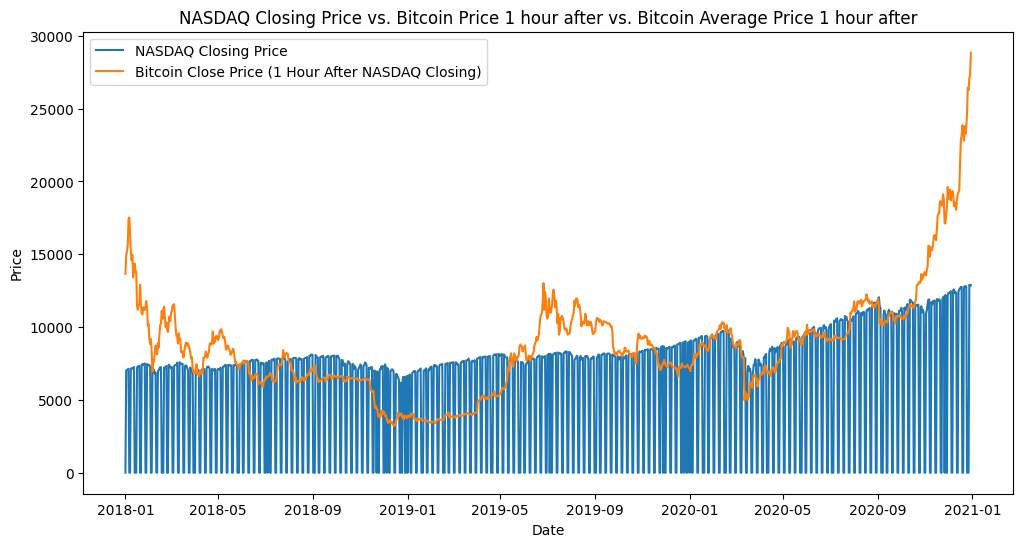

Correlation between NASDAQ closing price and Bitcoin Average price 1 hour after: 0.18010937888801495


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import tweepy
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


def collect_data(symbol):
    # Define the start and end dates for the data
    start_date = '2018-01-01'
    end_date = '2021-01-01'

    # Collect data from Yahoo Finance using yfinance, Collect NASDAQ closing price data
    nasdaq_data = yf.download('^IXIC', start=start_date, end=end_date, progress=False)
    nasdaq_closing_prices = nasdaq_data['Close']
    nasdaq_change = nasdaq_data['Close'] - nasdaq_data['Open']
    # Determine if the Nasdaq has risen or fallen
    nasdaq_rise_fall = pd.Series(np.where(nasdaq_change >= 0, 1, 0), index=nasdaq_closing_prices.index)

    # colect S&P 500 data from Yahoo Finance
    SP_500_data = yf.download('^GSPC', start=start_date, end=end_date, progress=False)
    SP_500_closing_prices = SP_500_data['Close']
    # colect Dow Jones Index data from Yahoo Finance
    DJIA_data = yf.download('^DJI', start=start_date, end=end_date, progress=False)
    DJIA_closing_prices = DJIA_data['Close']

    # Collect Bitcoin closing price and volume data
    bitcoin_data = yf.download(symbol, start=start_date, end=end_date, progress=False)
    bitcoin_closing_prices = bitcoin_data['Close']
    bitcoin_daily_volumes = bitcoin_data['Volume']

    # Calculate average price of Bitcoin for 1 hour after NASDAQ closing
    # Resample the data to 1-minute frequency
    bitcoin_minute_data = bitcoin_data.resample('1T').ffill()
    # Filter the data for the hour between 16:00 and 17:00
    bitcoin_hour_between_16_to_17 = bitcoin_minute_data.between_time('16:00', '17:00')
    # Calculate the average price for the hour after nasdaq closing
    bitcoin_average_price_between_16_to_17 = bitcoin_hour_between_16_to_17.resample('D').mean()['Close']

    # Set the frequency of the data to hourly
    bitcoin_hourly_data = bitcoin_data.resample('H').ffill()
    # Resample Bitcoin data to hourly frequency and get the hourly price at 17:00
    bitcoin_hour_after_nasdaq_closing = bitcoin_hourly_data.between_time('17:00', '17:00')
    bitcoin_hour_after_nasdaq_closing = bitcoin_hour_after_nasdaq_closing.resample('D').ffill()

    # Print the data for debugging
    #print(bitcoin_hour_after_nasdaq_closing)

    # Calculate the hourly trend
    bitcoin_hour_after_nasdaq_closing_trend = bitcoin_hour_after_nasdaq_closing['Close'] - bitcoin_hour_after_nasdaq_closing['Open']
    #print(bitcoin_hour_after_nasdaq_closing_trend)
    bitcoin_hour_after_nasdaq_closing_high_avg_perc = (bitcoin_hour_after_nasdaq_closing['High'] - bitcoin_average_price_between_16_to_17) / bitcoin_average_price_between_16_to_17 * 100
    #print(bitcoin_hour_after_nasdaq_closing_high_avg_perc)
    bitcoin_hour_after_nasdaq_closing_avg_low_perc = (bitcoin_hour_after_nasdaq_closing['Low'] - bitcoin_average_price_between_16_to_17) / bitcoin_average_price_between_16_to_17 * 100

    # Combine the data into a single DataFrame
    data = pd.DataFrame({
        'nasdaq_closing_price': nasdaq_closing_prices,
        'nasdaq_rise_fall': nasdaq_rise_fall,
        'SP_500_closing_price': SP_500_closing_prices,
        'DJIA_closing_price': DJIA_closing_prices,
        'bitcoin_closing_price': bitcoin_closing_prices,
        'bitcoin_daily_volume': bitcoin_daily_volumes,
        'bitcoin_hour_after_nasdaq_closing': bitcoin_hour_after_nasdaq_closing['Close'],
        'bitcoin_hourly_average_price_after_nasdaq_closing': bitcoin_average_price_between_16_to_17,
        'bitcoin_hour_after_nasdaq_closing_trend': bitcoin_hour_after_nasdaq_closing_trend,
        'bitcoin_hour_after_nasdaq_closing_high_avg_perc': bitcoin_hour_after_nasdaq_closing_high_avg_perc,
        'bitcoin_hour_after_nasdaq_closing_avg_low_perc': bitcoin_hour_after_nasdaq_closing_avg_low_perc
    })

    # Fill NaN values for nasdaq_closing_price and other columns with 0
    data['nasdaq_closing_price'].fillna(0, inplace=True)
    data['nasdaq_rise_fall'].fillna(-1, inplace=True)
    data['SP_500_closing_price'].fillna(0, inplace=True)
    data['DJIA_closing_price'].fillna(0, inplace=True)

    return data


# Feature Engineering
def engineer_features(data):
    # Calculate Bitcoin moving averages
    data['bitcoin_ma_hourly_avg_3'] = data['bitcoin_hourly_average_price_after_nasdaq_closing'].rolling(window=3).mean()
    data['bitcoin_ma_hourly_avg_7'] = data['bitcoin_hourly_average_price_after_nasdaq_closing'].rolling(window=7).mean()
    data['bitcoin_ma_hourly_avg_30'] = data['bitcoin_hourly_average_price_after_nasdaq_closing'].rolling(window=30).mean()

    # Calculate Bitcoin RSI
    delta = data['bitcoin_hourly_average_price_after_nasdaq_closing'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    data['bitcoin_rsi'] = 100 - (100 / (1 + rs))

    # Calculate Bitcoin Bollinger Bands
    data['bitcoin_bb_middle'] = data['bitcoin_hourly_average_price_after_nasdaq_closing'].rolling(window=20).mean()
    data['bitcoin_bb_std'] = data['bitcoin_hourly_average_price_after_nasdaq_closing'].rolling(window=20).std()
    data['bitcoin_bb_upper'] = data['bitcoin_bb_middle'] + (2 * data['bitcoin_bb_std'])
    data['bitcoin_bb_lower'] = data['bitcoin_bb_middle'] - (2 * data['bitcoin_bb_std'])


    data['bitcoin_ma_hourly_avg_3'].fillna(0, inplace=True)
    data['bitcoin_ma_hourly_avg_7'].fillna(0, inplace=True)
    data['bitcoin_ma_hourly_avg_30'].fillna(0, inplace=True)
    data['bitcoin_rsi'].fillna(0, inplace=True)
    data['bitcoin_bb_middle'].fillna(0, inplace=True)
    data['bitcoin_bb_std'].fillna(0, inplace=True)
    data['bitcoin_bb_upper'].fillna(0, inplace=True)
    data['bitcoin_bb_lower'].fillna(0, inplace=True)

    return data

# Preprocessing
def preprocess_data(data):
    # Drop missing values
    data.dropna(inplace=True)

    # Select features
    features = ['nasdaq_close', 'bitcoin_ma_5', 'bitcoin_ma_3', 'bitcoin_rsi', 'bitcoin_bb_upper', 'bitcoin_bb_middle',
                'bitcoin_bb_lower', 'nasdaq_rise_fall']
    X = data[features]

    # Select target variables
    y_fluctuation_trend = data['bitcoin_fluctuation_trend']
    y_average_price = data['bitcoin_average_price']

    return X, y_fluctuation_trend, y_average_price


def authenticate_api():
    consumer_key = "HWE8RI8Fmekw2CLHEl2mlL3TB"
    consumer_secret = "KHHs02430ny4lWS17oTvLcEWaCm2X5h4MzXRERcWWhOn2Uigsf"
    access_token = "989685235-tqQRfOGigiYgI8GySXYoa2MKRGFKU9NWuX79QeNM"
    access_token_secret = "gdKuRfbxdUUFtvjIFG5g1OrOOSRB8tG0EnFTmooRTJoRE"

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)

    return api

# Bitcoin Sentimental Analysis on Twitter
def sentimental_analysis_twitter(data, query):
    api = authenticate_api()

    num_tweets = 100
    expansion_fields = "public_metrics,created_at,author_id,lang"
    try:
        tweets = api.search_tweets(query, lang='en', count=num_tweets)
    except Exception as e:
        print(f"Error fetching tweets: {e}")
        return data

    if len(tweets) == 0:
        print("No tweets found for the given query.")
        return data

    sentiments = []
    for tweet in tweets:
        analysis = TextBlob(tweet['text'])
        sentiment = analysis.sentiment.polarity
        sentiments.append(sentiment)

    aggregate_sentiment = sum(sentiments) / len(sentiments)

    print("Aggregate Sentiment Score:", aggregate_sentiment)
    data['bitcoin_aggregate_sentiment_score_twitter'] = aggregate_sentiment
    return data



symbol = 'BTC-USD'
data = collect_data(symbol)
data = engineer_features(data)
#query = "Elon Musk Bitcoin"
#result = sentimental_analysis_twitter(data, query)

nasdaq_close = data['nasdaq_closing_price']
bitcoin_hour_after_nasdaq_closing = data['bitcoin_hour_after_nasdaq_closing']
bitcoin_hourly_average_price_after_nasdaq_closing = data['bitcoin_hourly_average_price_after_nasdaq_closing']

# Combine the dataframes based on the date index
combined_data = pd.concat([nasdaq_close, bitcoin_hour_after_nasdaq_closing, bitcoin_hourly_average_price_after_nasdaq_closing], axis=1)
combined_data.columns = ['nasdaq_close', 'bitcoin_hour_after_nasdaq_closing', 'bitcoin_hourly_average_price_after_nasdaq_closing']

# Drop any rows with missing values
combined_data.dropna(inplace=True)

# Select the required columns for plotting and correlation
plot_data = combined_data[['nasdaq_close', 'bitcoin_hour_after_nasdaq_closing', 'bitcoin_hourly_average_price_after_nasdaq_closing']].copy()
correlation_data = combined_data[['nasdaq_close', 'bitcoin_hour_after_nasdaq_closing']]

# Plot NASDAQ closing price and hourly closing/average Bitcoin price
plt.figure(figsize=(12, 6))
plt.plot(plot_data.index, plot_data['nasdaq_close'], label='NASDAQ Closing Price')
plt.plot(plot_data.index, plot_data['bitcoin_hour_after_nasdaq_closing'], label='Bitcoin Close Price (1 Hour After NASDAQ Closing)')
#plt.plot(plot_data.index, plot_data['bitcoin_hourly_average_price_after_nasdaq_closing'], label='Bitcoin Average Price (1 Hour After NASDAQ Closing)')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NASDAQ Closing Price vs. Bitcoin Price 1 hour after vs. Bitcoin Average Price 1 hour after')
plt.legend()
plt.show()

# Compute the correlation between NASDAQ closing price and Bitcoin price
correlation = correlation_data['nasdaq_close'].corr(correlation_data['bitcoin_hour_after_nasdaq_closing'])
print("Correlation between NASDAQ closing price and Bitcoin Average price 1 hour after:", correlation)


#print(data.head(50))

